In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv("10-2023.csv", sep=";")
df.head()

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
0,1001,2023-10-01 00:00:00,C30,1020,3.0,0,60.0,N,5
1,1001,2023-10-01 00:15:00,C30,828,3.0,0,60.0,N,5
2,1001,2023-10-01 00:30:00,C30,600,1.0,0,64.0,N,5
3,1001,2023-10-01 00:45:00,C30,1080,3.0,0,57.0,N,5
4,1001,2023-10-01 01:00:00,C30,744,2.0,0,55.0,N,5


In [76]:
set(df["tipo_elem"])

{'C30', 'M30', 'URB'}

In [77]:
df = df[df["tipo_elem"] == "M30"]
df

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
377879,3488,2023-10-01 00:00:00,M30,2016,4.0,47,85.0,N,15
377880,3488,2023-10-01 00:15:00,M30,1881,4.0,46,83.0,N,15
377881,3488,2023-10-01 00:30:00,M30,1912,5.0,43,82.0,N,15
377882,3488,2023-10-01 00:45:00,M30,1692,5.0,42,84.0,N,15
377883,3488,2023-10-01 01:00:00,M30,1532,4.0,38,84.0,N,15
...,...,...,...,...,...,...,...,...,...
11591546,10662,2023-10-31 22:45:00,M30,232,1.0,14,80.0,N,15
11591547,10662,2023-10-31 23:00:00,M30,200,1.0,12,83.0,N,15
11591548,10662,2023-10-31 23:15:00,M30,296,2.0,18,86.0,N,15
11591549,10662,2023-10-31 23:30:00,M30,305,2.0,17,81.0,N,15


In [78]:
set(df["tipo_elem"])

{'M30'}

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811132 entries, 377879 to 11591550
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   811132 non-null  int64  
 1   fecha                811132 non-null  object 
 2   tipo_elem            811132 non-null  object 
 3   intensidad           811132 non-null  int64  
 4   ocupacion            811132 non-null  float64
 5   carga                811132 non-null  int64  
 6   vmed                 802167 non-null  float64
 7   error                786080 non-null  object 
 8   periodo_integracion  811132 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 61.9+ MB


In [80]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811132 entries, 377879 to 11591550
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   811132 non-null  int64         
 1   fecha                811132 non-null  datetime64[ns]
 2   tipo_elem            811132 non-null  object        
 3   intensidad           811132 non-null  int64         
 4   ocupacion            811132 non-null  float64       
 5   carga                811132 non-null  int64         
 6   vmed                 802167 non-null  float64       
 7   error                786080 non-null  object        
 8   periodo_integracion  811132 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 61.9+ MB


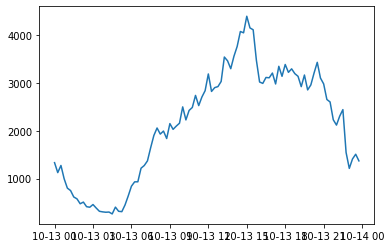

In [81]:
aux = df[df["id"] == 3488]
aux = aux[aux["fecha"].dt.day == 13]
X = aux["intensidad"]
y = aux["fecha"]

plt.plot(y, X)

In [82]:
print(len(set(df["id"])))

289


In [83]:
from datetime import datetime

filtro1 = (
    (df['fecha'].dt.weekday < 5) &  # 0-4 corresponden a lunes a viernes
    (df['fecha'].dt.hour >= 6) &
    (df['fecha'].dt.hour < 8)
)

filtro2 = (
    (df['fecha'].dt.weekday < 5) &  # 0-4 corresponden a lunes a viernes
    (df['fecha'].dt.hour == 8) &
    (df['fecha'].dt.minute == 0) &
    (df['fecha'].dt.second == 0) 
)

# Aplicar el filtro al DataFrame
df_filtrado1 = df[filtro1]
df_filtrado2 = df[filtro2]

merged_df = pd.concat([df_filtrado1, df_filtrado2])

In [84]:
merged_df

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
377999,3488,2023-10-02 06:00:00,M30,1000,2.0,23,94.0,N,15
378000,3488,2023-10-02 06:15:00,M30,1268,3.0,28,91.0,N,15
378001,3488,2023-10-02 06:30:00,M30,1352,2.0,31,90.0,N,15
378002,3488,2023-10-02 06:45:00,M30,1533,3.0,35,90.0,N,15
378003,3488,2023-10-02 07:00:00,M30,1728,5.0,39,87.0,N,15
...,...,...,...,...,...,...,...,...,...
11590911,10662,2023-10-25 08:00:00,M30,904,6.0,52,81.0,N,15
11591007,10662,2023-10-26 08:00:00,M30,752,5.0,45,82.0,N,15
11591103,10662,2023-10-27 08:00:00,M30,784,6.0,46,81.0,N,15
11591391,10662,2023-10-30 08:00:00,M30,800,5.0,48,83.0,N,15


In [85]:
merged_df['fecha'] = pd.to_datetime(merged_df['fecha'])

In [86]:
merged_df = merged_df.sort_values(by=["id", "fecha"])

In [87]:
merged_df

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
377999,3488,2023-10-02 06:00:00,M30,1000,2.0,23,94.0,N,15
378000,3488,2023-10-02 06:15:00,M30,1268,3.0,28,91.0,N,15
378001,3488,2023-10-02 06:30:00,M30,1352,2.0,31,90.0,N,15
378002,3488,2023-10-02 06:45:00,M30,1533,3.0,35,90.0,N,15
378003,3488,2023-10-02 07:00:00,M30,1728,5.0,39,87.0,N,15
...,...,...,...,...,...,...,...,...,...
11591483,10662,2023-10-31 07:00:00,M30,312,3.0,19,83.0,N,15
11591484,10662,2023-10-31 07:15:00,M30,267,1.0,17,85.0,N,15
11591485,10662,2023-10-31 07:30:00,M30,457,4.0,28,83.0,N,15
11591486,10662,2023-10-31 07:45:00,M30,653,4.0,39,85.0,N,15


In [88]:
print(set(merged_df["intensidad"]))

{0, 4, 5, 7, 8, 11, 12, 13, 16, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 111, 112, 113, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 171, 172, 173, 175, 176, 177, 179, 180, 181, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 243, 244, 245, 247, 248, 2

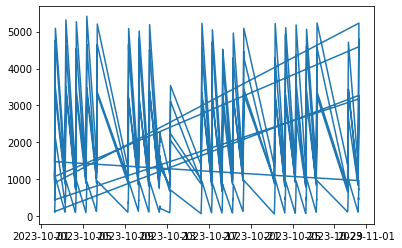

In [89]:
X = merged_df["intensidad"][:1000]
y = merged_df["fecha"][:1000]

plt.plot(y, X)

In [90]:
def df_day(day, dataframe):

    filtro = (
        (dataframe['fecha'].dt.day == day)
    )

    return dataframe[filtro].groupby('fecha')['intensidad'].mean().reset_index()

Sin media

In [22]:
def df_day_sin(day, dataframe):

    filtro = (
        (dataframe['fecha'].dt.day == day)
    )

    return dataframe[filtro][['fecha','intensidad']]

In [91]:
df = df_day(10, merged_df)

df

,fecha,intensidad
0,2023-10-10 06:00:00,560.224638
1,2023-10-10 06:15:00,783.557971
2,2023-10-10 06:30:00,1193.996377
3,2023-10-10 06:45:00,1453.884615
4,2023-10-10 07:00:00,1598.145098
5,2023-10-10 07:15:00,1825.949219
6,2023-10-10 07:30:00,2031.726190
7,2023-10-10 07:45:00,2253.200000
8,2023-10-10 08:00:00,2312.737452


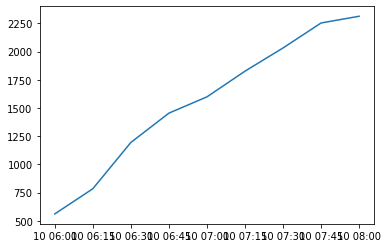

In [92]:
X = df["intensidad"]
y = df["fecha"]

plt.plot(y, X)

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

t_missing = 8
X_train = df["intensidad"][:-1]
X_test = df["intensidad"][-1:]

model = SARIMAX(X_train)


f = model.fit()

p = f.predict(start = t_missing, end = t_missing, dynamic = True)

C:\Users\mussi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [36]:
new = pd.concat([X_train, p])
new

0     560.224638
1     783.557971
2    1193.996377
3    1453.884615
4    1598.145098
5    1825.949219
6    2031.726190
7    2253.200000
8    2226.089842
dtype: float64

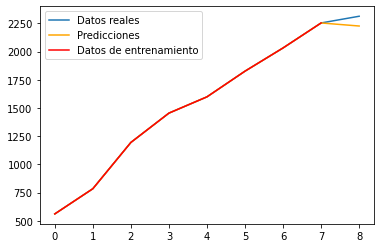

In [37]:
plt.plot(df["intensidad"], label='Datos reales')
plt.plot(new, color='orange', label='Predicciones')
plt.plot(X_train, color='red', label='Datos de entrenamiento')
plt.legend()

# Mostramos la figura
plt.show()

In [104]:
total2 = pd.DataFrame()

for i in range(1,31):
    a = df_day(i, merged_df)
    total2 = pd.concat([total2,a])

In [105]:
total2.reset_index(drop=True,inplace=True)


In [106]:
total2

,fecha,intensidad
0,2023-10-02 06:00:00,569.417266
1,2023-10-02 06:15:00,783.189964
2,2023-10-02 06:30:00,1157.308244
3,2023-10-02 06:45:00,1440.795455
4,2023-10-02 07:00:00,1598.361538
...,...,...
184,2023-10-30 07:00:00,1520.616858
185,2023-10-30 07:15:00,1679.680769
186,2023-10-30 07:30:00,1890.366142
187,2023-10-30 07:45:00,2010.085271


In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [119]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

dia_31 = df_day(31, merged_df)

t_missing = [190,198]
X_train = total2["intensidad"]

X_test = dia_31

model = SARIMAX(X_train,order=(0, 3, 2),seasonal_order=(1,1,0,9))


f = model.fit()

p = f.predict(start = t_missing[0], end = t_missing[1], dynamic = True)

total2

C:\Users\mussi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\mussi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


,fecha,intensidad
0,2023-10-02 06:00:00,569.417266
1,2023-10-02 06:15:00,783.189964
2,2023-10-02 06:30:00,1157.308244
3,2023-10-02 06:45:00,1440.795455
4,2023-10-02 07:00:00,1598.361538
...,...,...
184,2023-10-30 07:00:00,1520.616858
185,2023-10-30 07:15:00,1679.680769
186,2023-10-30 07:30:00,1890.366142
187,2023-10-30 07:45:00,2010.085271


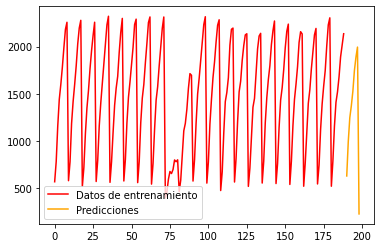

In [120]:
plt.plot(X_train, color='red', label='Datos de entrenamiento')
plt.plot(p, color='orange', label='Predicciones')

plt.legend()

# Mostramos la figura
plt.show()